# Fall 2022 Data Science Intern Challenge

Dataset: https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0

Before beginning any analysis, we need to first understand the data and each of its attributes. We will load the dataset into a pandas dataframe. Then, we will display the first few rows of the dataframe to see what we are dealing with.

In [19]:
# Load dataset into pandas dataframe
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head(6)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01


We will now provide the descriptive statistics of the dataset.

In [3]:
# Describe the dataset
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Question 1 a) 
Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

Within the dataset, it can be noticed that the median value (284) is much lower than the mean value (3145.128). This means that the data is highly skewed which highlights that the majority of AOVs are higher than normal. This can also be seen by the minimum value and maximum value having such a huge difference. This skewness will result to an inaccurate AOV. We will visualize this through a histogram.

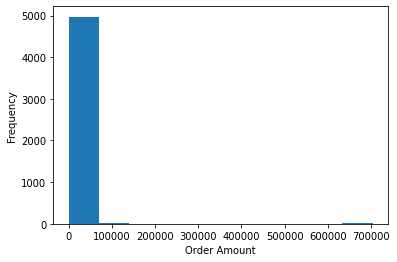

In [4]:
import matplotlib.pyplot as plt
import numpy as np

order_amount_val = data['order_amount']

plt.hist(order_amount_val)

plt.xlabel('Order Amount')
plt.ylabel('Frequency')

plt.show()


We can clearly see there are many outliers in the dataset which need to be rectified to get a normal distribution.

How can we fix this skewness?

In order to fix this skewness, we will remove the outliers. Due, to the large nature of the dataset, removing the outliers will result not lead to any data loss, inaccuracy or bias. We will be looking deeper into the dataset to find the outliers.

In [49]:
data.sort_values(by=['order_amount'], ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
...,...,...,...,...,...,...,...
4923,4924,92,965,90,1,credit_card,2017-03-09 5:05:11
3187,3188,92,854,90,1,credit_card,2017-03-08 18:16:25
4932,4933,92,823,90,1,credit_card,2017-03-24 2:17:13
4183,4184,92,844,90,1,debit,2017-03-26 4:22:39


As we can see, the outlier values are big which results in a skewed AOV result. Therefore, we will be looking at shop_id 42 and 78 which have the outliers and remove them from the study. 

In [50]:
# Remove outliers with shop_id = 42 and shop_id = 78
data = data[data['shop_id'] != 42]
data = data[data['shop_id'] != 78]
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717
std,1444.221163,29.154367,86.887947,155.941112,0.982602
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000


Text(0, 0.5, 'Frequency')

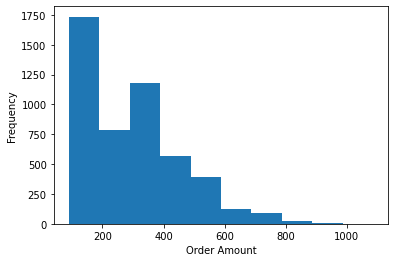

In [54]:
# Create histogram of order amount
plt.hist(data['order_amount'])
plt.xlabel('Order Amount')
plt.ylabel('Frequency')


The skewness is still present in the dataset. However, it is comparatively better distributed than the previous histogram. The previous AOV result was 3145.128 which was highly skewed.

New AOV Result

The new average order value is 300.155, which is much better than the previous result.

In [57]:
data['order_amount'].mean()

300.1558229655313

## Question 1 b)
What metric would you report for this dataset?

For the metric, I would personally use the median value as it is the most representative of the dataset. The average order value (AOV) does not provide an accurate description of the average.

## Question 1 c)
What is its value?


The median metric value is 284.

In [59]:
data['order_amount'].median()

284.0

## Question 2 a)

How many orders were shipped by Speedy Express in total?

Speedy express with 54 orders shipped in total.

In [ ]:
SELECT Count (*)
FROM Orders
JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';

## Question 2 b)

What is the last name of the employee with the most orders?

Last name of the employee with the most orders is Peacock having 40 orders.

In [ ]:
SELECT LastName, COUNT (*) AS most_orders
FROM Employees
JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY Employees.LastName
ORDER BY most_orders DESC;

## Question 2 c)

What product was ordered the most by customers in Germany?


Gorgonzola Telino was ordered the most by customers in Germany having 11450 orders.

In [ ]:
SELECT Products.ProductName, SUM(OrderDetails.Quantity) as most_orders
FROM Orders
JOIN OrderDetails ON OrderDetails.OrderID = OrderDetails.OrderID
JOIN Products ON OrderDetails.ProductID = Products.ProductID
JOIN Customers ON Customers.CustomerID = Orders.CustomerID
WHERE Customers.Country = 'Germany'
GROUP BY Products.ProductName
ORDER BY most_orders DESC;